In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import re

In [12]:
data_path = "../simulation_results/wastewater/april"
result_path = "../preprocessing/preprocessed_data/april"

## substances

In [13]:
file_name = "INSIDe_substances_results1_output.txt"

In [14]:
def tidy_substances(file_name, data_path):
    # Path to text file
    file_path = f"{data_path}/{file_name}"

    # Initialize containers
    records = []
    current_variable = None
    current_manhole = None

    # Regular expressions
    manhole_pattern = re.compile(r'INSIDe_substances_results_1_output_manhole_(MUC\d+)\.txt')
    header_pattern = re.compile(r'time\[min\]\s+(\w+)\([^)]+\) concentration')
    data_pattern = re.compile(r'^(\d+)\s+([-\d.eE]+)$')

    # Read file line by line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Skip empty lines
            if not line or line == '##':
                continue

            # Match manhole ID
            manhole_match = manhole_pattern.match(line)
            if manhole_match:
                current_manhole = manhole_match.group(1)
                continue

            # Match variable name
            header_match = header_pattern.match(line)
            if header_match:
                current_variable = header_match.group(1)
                continue

            # Match data lines
            data_match = data_pattern.match(line)
            if data_match and current_variable and current_manhole:
                time = int(data_match.group(1))
                value = float(data_match.group(2))
                records.append({
                    "time_in_minutes": time,
                    "variable": current_variable,
                    "value": value,
                    "manhole": current_manhole
                })
    df = pd.DataFrame(records)
    df = df.loc[df.variable!="T"]
    df["time_in_days"] = df["time_in_minutes"]/(24*60)
    return df

In [15]:
df = tidy_substances(file_name, data_path)
df["simulation_id"] = 1
df.to_csv(f"{result_path}/substances/1_output.csv", index=False)

In [16]:
df.manhole.unique()

array(['MUC012', 'MUC060', 'MUC112', 'MUC348', 'MUC362', 'MUC434',
       'MUC494', 'MUC560', 'MUC562', 'MUC586', 'MUC600', 'MUC608'],
      dtype=object)

In [17]:
df.variable.unique()

array(['COV19', 'PMMoV'], dtype=object)

In [47]:
df.loc[df.variable=="PMMoV", "time"].value_counts().describe()["std"]

np.float64(0.0)

In [48]:
df.loc[df.variable=="COV19", "time"].value_counts().describe()["std"]

np.float64(0.0)

In [49]:
df.loc[df.variable=="COV19", "value"].describe()

count    85540.000000
mean         4.190165
std         10.007633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.049465
max         67.956350
Name: value, dtype: float64

In [50]:
df.loc[df.variable=="PMMoV", "value"].describe()

count    85540.000000
mean        -0.001334
std          0.002827
min         -0.008330
25%         -0.000030
50%         -0.000000
75%          0.000000
max          0.000000
Name: value, dtype: float64

In [51]:
df.manhole.unique()

array(['MUC012', 'MUC060', 'MUC112', 'MUC338', 'MUC348', 'MUC362',
       'MUC394', 'MUC434', 'MUC494', 'MUC560'], dtype=object)

## hydraulic results

In [109]:
file_name = "INSIDe_hydraulic_results1_output.txt"

In [110]:
def tidy_hydraulics(file_name, data_path):

    file_path = f"{data_path}/{file_name}"

    # Containers
    records = []
    current_pipe = None
    current_variable = "flow_rate"  # Only one variable here

    # Regex patterns
    pipe_pattern = re.compile(r'INSIDe_hydraulic_results_1_output_pipe_(\d+)')
    data_pattern = re.compile(r'^([\d.,]+)\s+([\d.,]+)$')

    # Read and parse the file
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line == "##":
                continue

            # Match pipe ID
            pipe_match = pipe_pattern.match(line)
            if pipe_match:
                current_pipe = pipe_match.group(1)
                continue

            # Skip headers
            if line.startswith("t [min]"):
                continue

            # Match data lines
            data_match = data_pattern.match(line)
            if data_match and current_pipe:
                time_str = data_match.group(1).replace(',', '.')
                value_str = data_match.group(2).replace(',', '.')
                try:
                    time = float(time_str)
                    value = float(value_str)
                    records.append({
                        "time": time,
                        "value": value,
                        "pipe_number": "pipe_"+current_pipe
                    })
                except ValueError:
                    continue  # skip lines that don't convert properly

    # Convert to DataFrame
    df = pd.DataFrame(records)
    return df

In [112]:
df = tidy_hydraulics(file_name, data_path)
df["simulation_id"] = 1
df.to_csv(f"{result_path}/hydraulics/1_output.csv", index=False)

In [73]:
df.head()

,time,value,pipe_number
0,1.0,0.003465,pipe_100048
1,2.0,0.003536,pipe_100048
2,4.0,0.003642,pipe_100048
3,5.0,0.003697,pipe_100048
4,6.0,0.003750,pipe_100048


In [76]:
df.pipe_number.unique()

array(['pipe_100048', 'pipe_100041', 'pipe_100066', 'pipe_100079',
       'pipe_100077', 'pipe_100078', 'pipe_100088', 'pipe_100085',
       'pipe_100095', 'pipe_100099', 'pipe_100169', 'pipe_100177',
       'pipe_100184', 'pipe_100233', 'pipe_100228', 'pipe_100261',
       'pipe_100248', 'pipe_100298'], dtype=object)

In [77]:
df.value.describe()

count    712818.000000
mean          0.269002
std           1.289450
min           0.000000
25%           0.000016
50%           0.001727
75%           0.120910
max          35.231280
Name: value, dtype: float64

<Axes: >

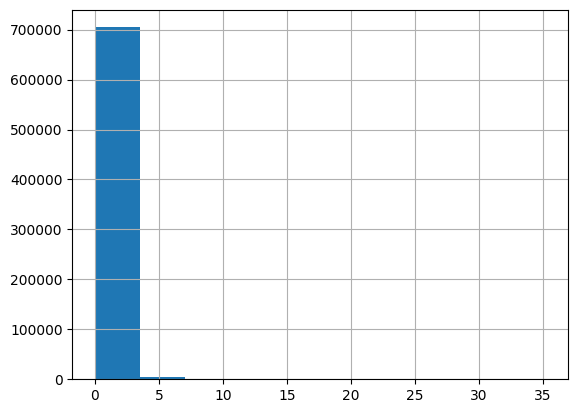

In [78]:
df.value.hist()